# General Overview

In this task, we will:

1. Create a LangChain agent that can describe a dataset.
2. Use the agent to identify NaN values in the dataset.
3. Generate a PDF report of the work.

## Part 1: Describe the Data

### Describe the Dataset:

- Use the agent to generate a description of the dataset, including summary statistics and basic visualizations.

## Part 2: Identify NaN Values

### Find NaN Values:

- Use the agent to identify and visualize NaN values in the dataset.

## Part 3: Generate PDF Report

### Generate a PDF Report:

- Summarize the work done in the previous steps and generate a PDF report using Python.

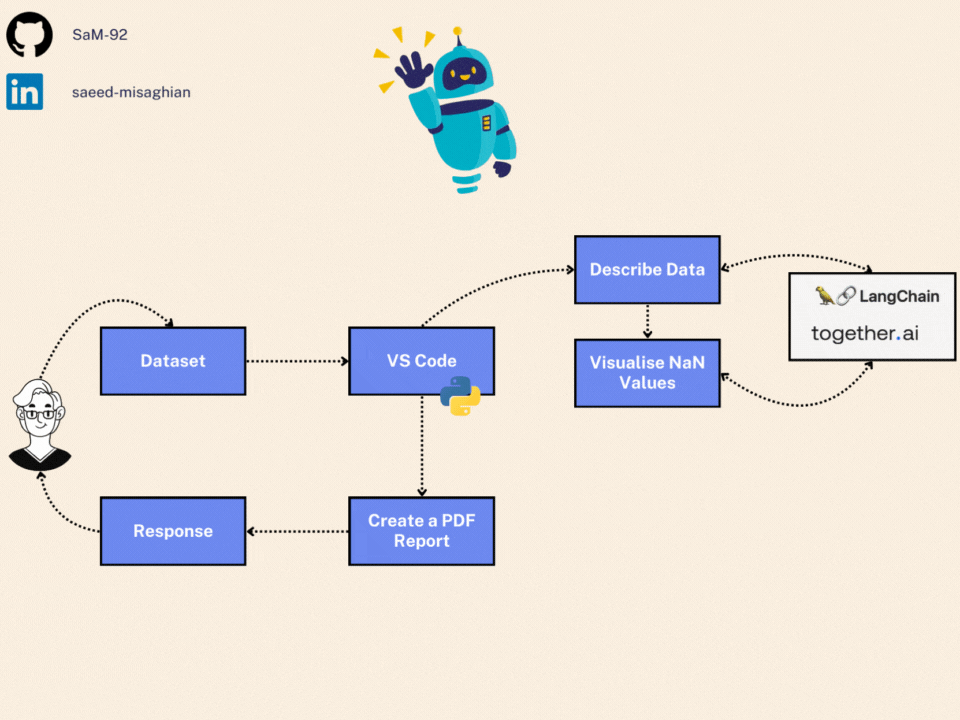

# Install Required Libraries

In [1]:
!pip install langchain pandas matplotlib seaborn fpdf2 langchain_together


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.6/990.6 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.4/206.4 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.7/336.7 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

# Sample Dataset

In [2]:
import pandas as pd
import numpy as np

# Create a sample dataset with NaN values
data = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, np.nan, 30, 22, 35],
    'Height': [5.5, 5.8, np.nan, 5.6, 5.9],
    'Weight': [130, 150, 160, np.nan, 140],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', np.nan]
})



In [3]:
data

,Name,Age,Height,Weight,City
0,Alice,25.0,5.5,130.0,New York
1,Bob,NaN,5.8,150.0,Los Angeles
2,Charlie,30.0,NaN,160.0,Chicago
3,David,22.0,5.6,NaN,Houston
4,Eve,35.0,5.9,140.0,NaN


# Create Report Agent

In [4]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_together import ChatTogether
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from fpdf import FPDF

TOGETHER_API_KEY=""


df = data


llm = ChatTogether(
    model="meta-llama/Llama-3-70b-chat-hf",
    together_api_key=TOGETHER_API_KEY
)

# Define the role

define_role = "Data Analyst"

# Create a prompt template
prompt = ChatPromptTemplate.from_messages([
    ("system", f"{define_role}"),
    ("user", "The dataset columns are {columns}. dataset is {dataset}. Write a statistical report based on the dataset.") #ToDo: Write the prompt
])

# Chain the prompt template with the LLM
chain = prompt | llm

# Function to interact with the agent
def describe_data(chain, dataset):
    input_data = {
        "columns": ", ".join(dataset.columns),
        "dataset":dataset
    }
    response = chain.invoke(input_data)
    return response.content

# Example usage:
data_desc = describe_data(chain, data)
print("Generated Content for Data Description:")
print(data_desc)



Generated Content for Data Description:
Here is a statistical report based on the provided dataset:

**Summary Statistics**

* **Age**:
	+ Mean: 28.00
	+ Median: 28.00
	+ Standard Deviation: 5.66
	+ Minimum: 22.00
	+ Maximum: 35.00
	+ Missing values: 1 (Bob)
* **Height**:
	+ Mean: 5.73
	+ Median: 5.70
	+ Standard Deviation: 0.21
	+ Minimum: 5.50
	+ Maximum: 5.90
	+ Missing values: 1 (Charlie)
* **Weight**:
	+ Mean: 145.00
	+ Median: 145.00
	+ Standard Deviation: 14.14
	+ Minimum: 130.00
	+ Maximum: 160.00
	+ Missing values: 1 (David)
* **City**:
	+ Most frequent city: None (all cities appear only once)
	+ Missing values: 1 (Eve)

**Descriptive Statistics**

* The average age of the individuals in the dataset is 28.00 years old, with a median age of 28.00 years old.
* The average height of the individuals in the dataset is 5.73 feet, with a median height of 5.70 feet.
* The average weight of the individuals in the dataset is 145.00 pounds, with a median weight of 145.00 pounds.
* The mo

## Part 2: Identify NaN Values

Generated Python Code for NaN Identification:
df.isnull().sum().plot(kind='bar', figsize=(10,6))
plt.title('Number of NaN values in each column')
plt.xlabel('Column Name')
plt.ylabel('Number of NaN values')
plt.savefig('nan_image.png')


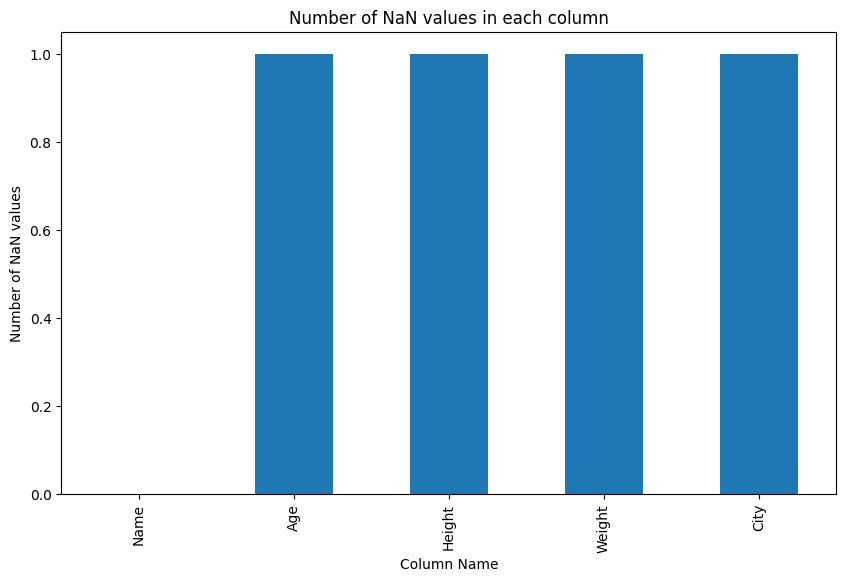

In [5]:
# Define the role for NaN identification
define_role_nan = """
You are a Data Analyst:
1. Identify NaN values in each column
2. Visualize the NaN values using a bar chart
Ensure the code does not use triple quotes and can be executed directly in Python.
Only return the code in a way that can be directly rendered in Python without import statements.
DO NOT PUT ANY RESPONSE RATHER THAN EXECUTABLE CODE
SAVE IMAGE with 'nan_image.png' name
"""

# Create a prompt template for NaN values
prompt_nan = ChatPromptTemplate.from_messages([
    ("system", define_role_nan),
    ("user", "Create a chart plotting the number of Nan values in each column of the dataset. The dataset columns are {columns}.")
])

# Chain the prompt template with the LLM
chain_nan = prompt_nan | llm

# Function to interact with the agent for NaN values
def find_nan_values(chain_nan, dataset):
    input_data = {
        "columns": ", ".join(dataset.columns)
    }
    response = chain_nan.invoke(input_data)
    return response.content

# Example usage:
nan_code = find_nan_values(chain_nan, data)

print("Generated Python Code for NaN Identification:")
print(nan_code)

# Execute the generated code
exec(nan_code)

# Check if image has been generated for you



# Create PDF Report

In [7]:
# Generate PDF report
class PDFReport(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Data Summary Report', 0, 1, 'C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(10)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

    def add_image(self, image_path, title):
        self.chapter_title(title)
        self.image(image_path, w=180)
        self.ln(10)

# Create the PDF
pdf = PDFReport()

# Add description
pdf.add_page()
pdf.chapter_title('Dataset Description')

description = data_desc
pdf.chapter_body(description)

pdf.add_page()  # Add a new page for the image
# Add NaN identification
pdf.add_image('nan_image.png', 'NaN Values Identification') #path to image



# Save the PDF
pdf_file_path = 'data_summary_report.pdf'
pdf.output(pdf_file_path)
print(f"PDF report generated and saved to {pdf_file_path}")


PDF report generated and saved to data_summary_report.pdf


<ipython-input-7-fa0eb7a9f16c>:4: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
<ipython-input-7-fa0eb7a9f16c>:5: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Data Summary Report', 0, 1, 'C')
<ipython-input-7-fa0eb7a9f16c>:8: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
<ipython-input-7-fa0eb7a9f16c>:9: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, title, 0, 1, 'L')
<ipython-input-7-fa0eb7a9f16c>:13: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', '', 12)
